<a href="https://colab.research.google.com/github/rene-michel/teste/blob/master/Ren%C3%A9_Michel_de_Azevedo_Mota_Nunes_lab301.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratório 301: Pré-Processamento dos Dados



O objetivo deste laboratório é aplicar na base do titanic as etapas de prepação de dados apresentadas em sala de aula. Ao final apresente uma base de dados adequada para um modelo de classificação. 

Algumas tarefas de preparação de dados são implementadas no pandas. Se necessário, investigue a [documentação](https://pandas.pydata.org/) para usar os métodos. 

Crie um passo a passo das ações que vão ser realizadas e coloque no espaço antes de começar. Por exemplo: 

* Tarefa 1: descrição do que vai ser feito.
* Tarefa 2: descrição do que vai ser feito.

Isso ajuda a documentar as ações que estão sendo realizadas e verificar eventuais erros ou equívocos no processo.

In [0]:
# Imports necessário

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats
from sklearn import preprocessing

## Dataset

Vamos trabalhar com a base do Titanic. A bose pode ser baixada na página do desafio do Titanic no Kaggle: https://www.kaggle.com/c/titanic

In [54]:
titanic_dataset = pd.read_csv("train.csv")
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Descrição das Tarefas

1. Eliminar atributos manualmente
2. Verificar se os dados estão desbalanceados

## Execução das Tarefas

In [55]:
titanic_dataset[['PassengerId','Name','Ticket','Fare']].head()

,PassengerId,Name,Ticket,Fare
0,1,"Braund, Mr. Owen Harris",A/5 21171,7.2500
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,71.2833
2,3,"Heikkinen, Miss. Laina",STON/O2. 3101282,7.9250
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,53.1000
4,5,"Allen, Mr. William Henry",373450,8.0500


In [56]:
titanic_dataset = titanic_dataset.drop(columns=['PassengerId','Name', 'Ticket'])
titanic_dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


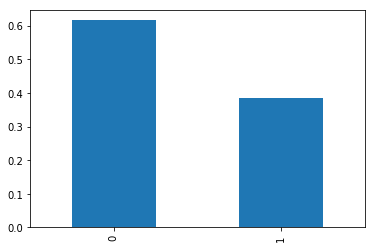

In [57]:
titanic_dataset['Survived'].value_counts(normalize=True).plot(kind='bar')

In [58]:
count_ = titanic_dataset.count()
count_

Survived    891
Pclass      891
Sex         891
Age         714
SibSp       891
Parch       891
Fare        891
Cabin       204
Embarked    889
dtype: int64

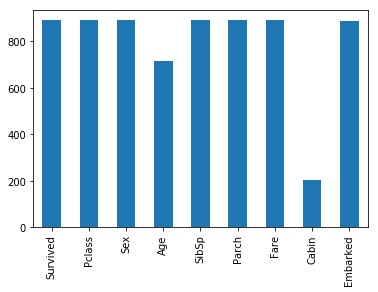

In [59]:
count_.plot(kind='bar')

In [0]:
titanic_dataset = titanic_dataset.drop(columns=['Cabin']) #Remover cabin por causa da falta de dados

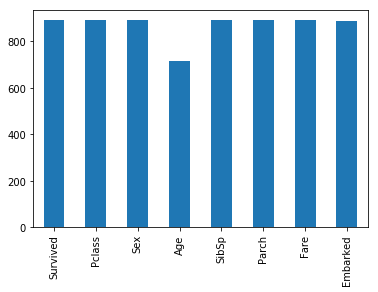

In [61]:
count_ = titanic_dataset.count()
count_.plot(kind='bar')

In [0]:
titanic_dataset['Age'] = titanic_dataset['Age'].fillna(titanic_dataset['Age'].mean()) #Preencher as idades que faltam com a média

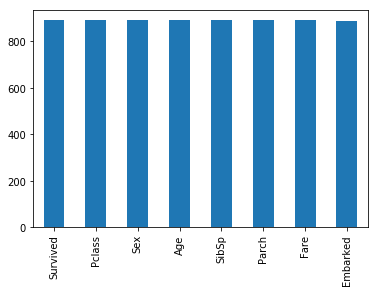

In [63]:
count_ = titanic_dataset.count()
count_.plot(kind='bar')

In [64]:
titanic_dataset.head(10)#Todos os registros sem idade ficaram com 29.699118


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
5,0,3,male,29.699118,0,0,8.4583,Q
6,0,1,male,54.000000,0,0,51.8625,S
7,0,3,male,2.000000,3,1,21.0750,S
8,1,3,female,27.000000,0,2,11.1333,S
9,1,2,female,14.000000,1,0,30.0708,C


In [65]:
titanic_dataset[titanic_dataset.duplicated()].shape

(111, 8)

In [66]:
titanic_corr = titanic_dataset[['Age', 'SibSp', 'Parch', 'Fare']].corr()
titanic_corr

,Age,SibSp,Parch,Fare
Age,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.232625,1.000000,0.414838,0.159651
Parch,-0.179191,0.414838,1.000000,0.216225
Fare,0.091566,0.159651,0.216225,1.000000


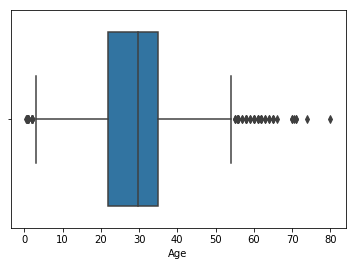

In [67]:
sns.boxplot(x=titanic_dataset['Age'])

In [0]:
titanic_dataset = pd.get_dummies(titanic_dataset, columns=['Sex', 'Embarked'])

In [69]:
titanic_dataset.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [0]:
titanic_dataset['Age'] = pd.cut(titanic_dataset['Age'], bins=4, labels=['crianca', 'jovem', 'adulto', 'idoso'])

In [72]:
titanic_dataset.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,jovem,1,0,7.2500,0,1,0,0,1
1,1,1,jovem,1,0,71.2833,1,0,1,0,0
2,1,3,jovem,0,0,7.9250,1,0,0,0,1
3,1,1,jovem,1,0,53.1000,1,0,0,0,1
4,0,3,jovem,0,0,8.0500,0,1,0,0,1


In [0]:
titanic_dataset['Age'] = pd.get_dummies(titanic_dataset, columns=['Age'])

In [75]:
titanic_dataset.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0.0,1,0,7.2500,0,1,0,0,1
1,1,1,1.0,1,0,71.2833,1,0,1,0,0
2,1,3,1.0,0,0,7.9250,1,0,0,0,1
3,1,1,1.0,1,0,53.1000,1,0,0,0,1
4,0,3,0.0,0,0,8.0500,0,1,0,0,1


In [0]:
min_max_scaler = preprocessing.MinMaxScaler()
float_array = titanic_dataset['Fare'].values
scaled_array = min_max_scaler.fit_transform(float_array[:, np.newaxis])
titanic_dataset['Fare'] = scaled_array

In [81]:
titanic_dataset.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0.0,1,0,0.014151,0,1,0,0,1
1,1,1,1.0,1,0,0.139136,1,0,1,0,0
2,1,3,1.0,0,0,0.015469,1,0,0,0,1
3,1,1,1.0,1,0,0.103644,1,0,0,0,1
4,0,3,0.0,0,0,0.015713,0,1,0,0,1
